---
title: "Changing labels to percentages"
author: "Damien Martin"
date: "2024-04-29 00:30"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Customizing the labels on a scale is one of the things that is different from ggplot. We use a function to format the label."
---

# Problem

We want to apply custom formatting to the labels on an axis.

The bad news is that we don't have a shortcut for common formatters (e.g. percentages), but the good news is that we have a method that allows us a lot of flexibility.

# Solution

We need a function that takes an iterable of labels we have by default, and outputs an iterable of formatted labels (in the same order). For example

```python
def percent_formatter(list_of_labels: list[str]) -> list[str]:
    return [f"{label:.0%}" for label in list_of_labels]
```

We can then pass this into one of the scale functions as the `labels` parameter, for example

```python
p9.scale_x_continuous(labels=percent_formatter)
```

Because the formatters are frequently pretty simple, they are often implemented as lambda functions, rather than standalone functions.

# Example

Our example is going to be pretty straightforward -- looking at the rating distribution for a single product on Amazon.

In [38]:
import plotnine as p9
import pandas as pd

In [39]:
lens_review = pd.DataFrame([
    {'stars': 5, 'num_customers': 121},
    {'stars': 4, 'num_customers': 6},
    {'stars': 3, 'num_customers': 0},
    {'stars': 2, 'num_customers': 1},
    {'stars': 1, 'num_customers': 3}
])

lens_review['frac_customers'] = lens_review['num_customers'] / lens_review['num_customers'].sum()

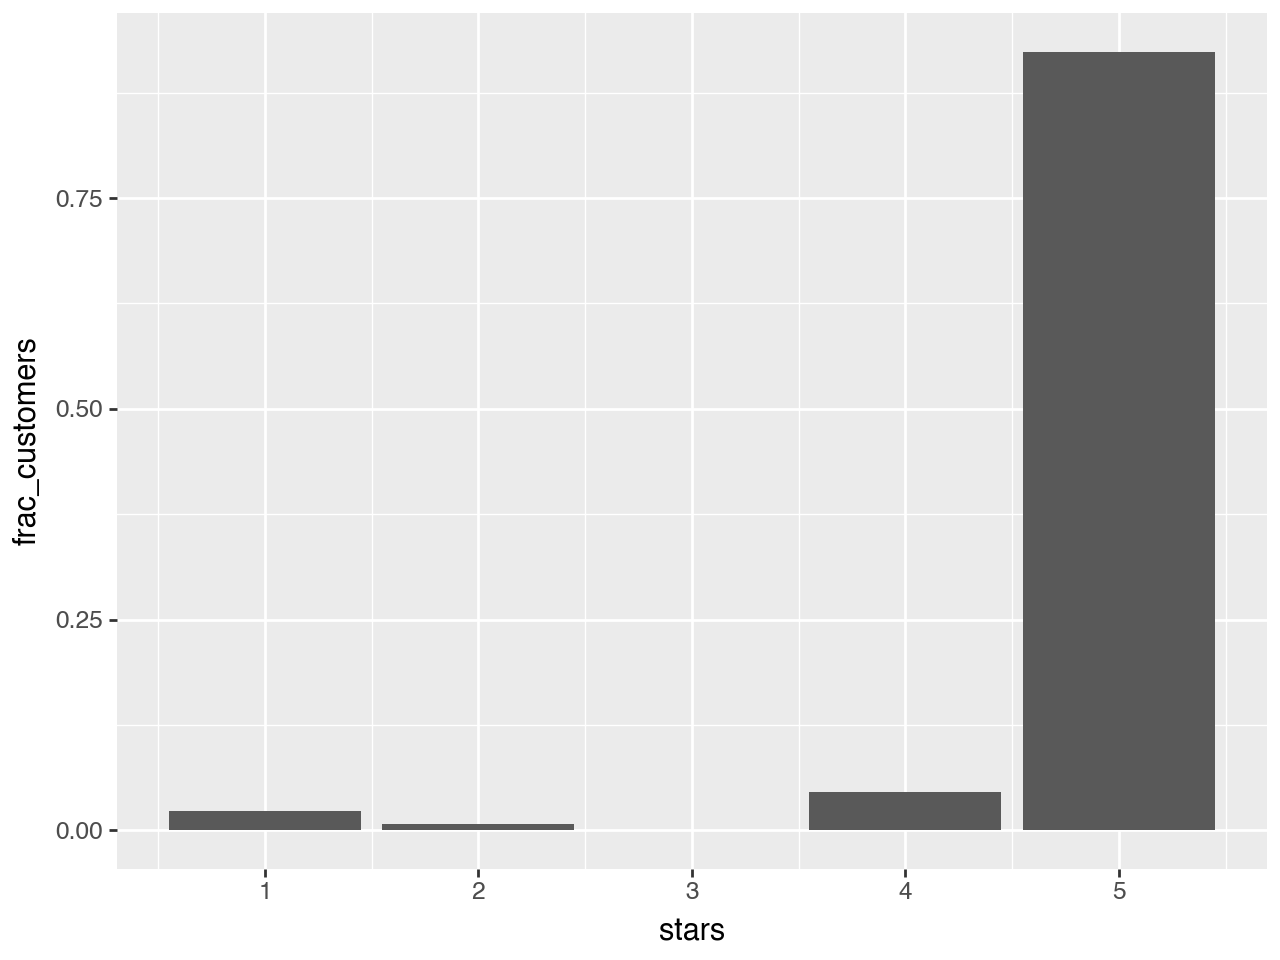

In [40]:
(
    p9.ggplot(lens_review, p9.aes(x='stars', y='frac_customers'))
    + p9.geom_bar(stat='identity')
)

Let's make the y axis formatted as percentages

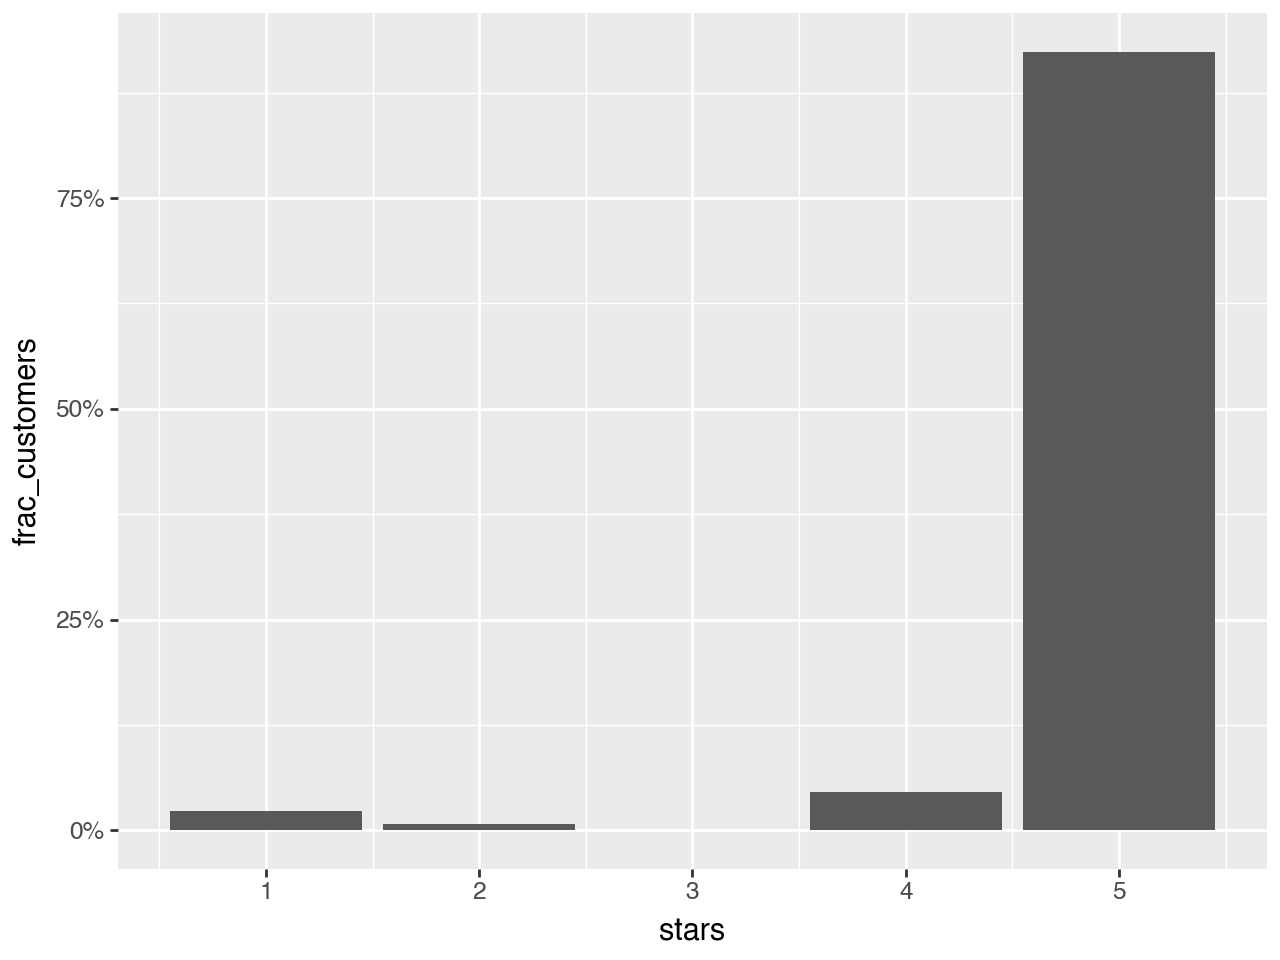

In [41]:
(
    p9.ggplot(lens_review, p9.aes(x='stars', y='frac_customers'))
    + p9.geom_bar(stat='identity')
    + p9.scale_y_continuous(labels=lambda labels: [f"{label:.0%}" for label in labels])
)

We can also make it more similar to the Amazon reviews by flipping the axes, and removing some of the distracting background

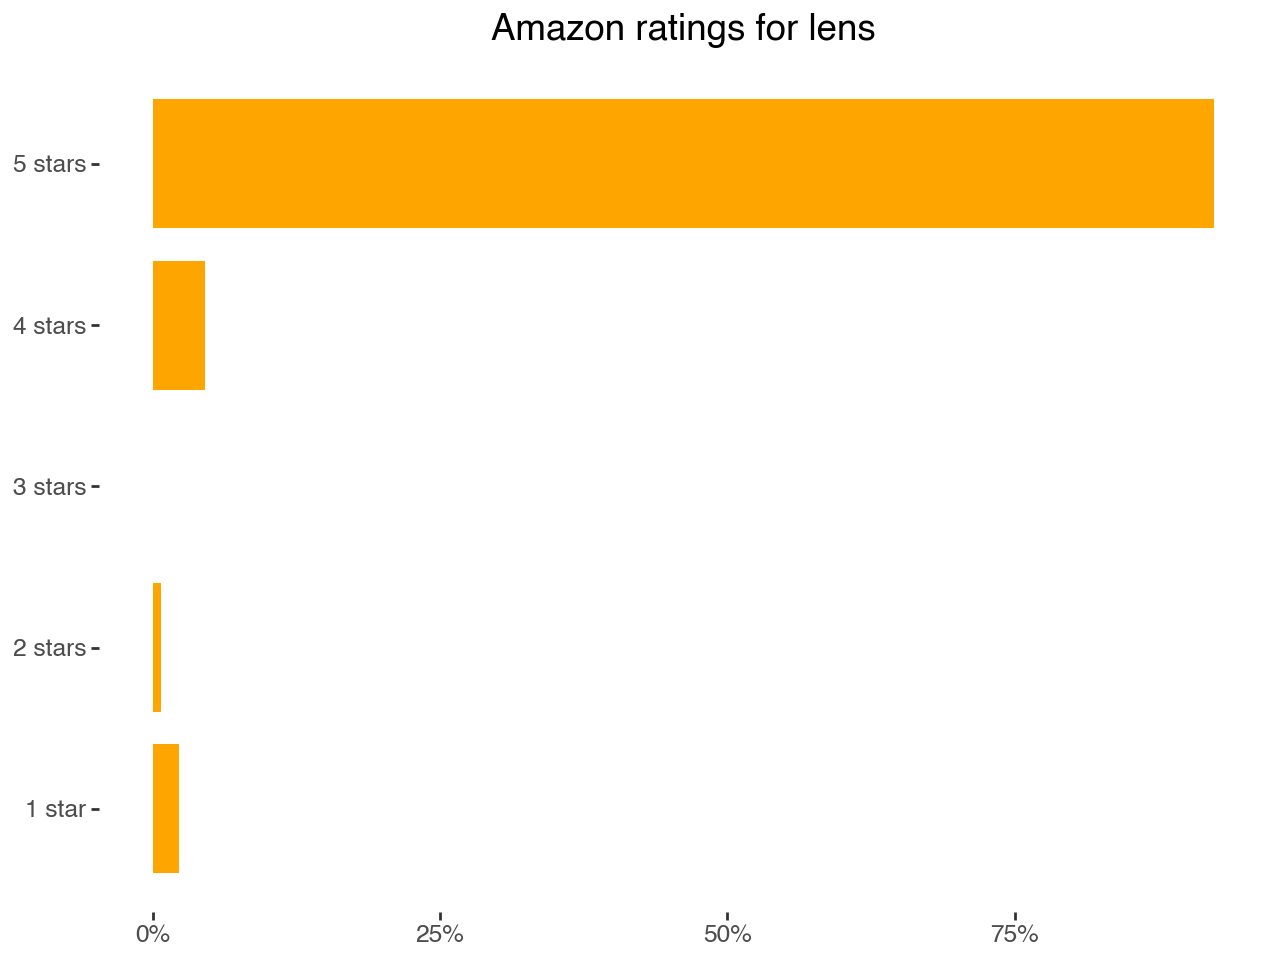

In [42]:
(
    p9.ggplot(lens_review, p9.aes(x='stars', y='frac_customers'))
    + p9.geom_bar(stat='identity', width=0.8, fill='orange')
    + p9.scale_y_continuous(labels=lambda labels: [f"{label:.0%}" for label in labels])
    + p9.scale_x_continuous(labels=lambda labels: [f"1 star" if label==1 else f"{label:.0f} stars" for label in labels])
    + p9.coord_flip()
    + p9.theme_bw()
    + p9.theme(
        panel_border = p9.element_blank(),
        panel_grid = p9.element_blank(),
    )
    + p9.labs(x="", y="", title="Amazon ratings for lens")
)